### Why Should you invest in this Stock?

Imagine someone who is new into the stock market world and he wants to know what price the particular stock would be and why should he invest in it to gain the benefits?

I have tried to create a model which gives insight of a stock for over 14 years of data which would help an individual to look at past trends and decide if they want to invest into it.
Here I have taken into consideration Apple Stock from year 2006 to 2019 and fit a model over it to determine if the model predicts the real stock market price.

### Important Imports

In [0]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from sklearn.model_selection import train_test_split


In [0]:
#Visualization Imports

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [0]:
from pandas_datareader import DataReader
from datetime import datetime
#Do this to not worry about floating number later

from __future__ import division

In [0]:
tech_comp = ['AAPL']

In [0]:
end = datetime(2019,8,15)

start = datetime(end.year-14,end.month,end.day)

In [0]:
for stock in tech_comp:
  globals()[stock] = DataReader(stock,'yahoo',start,end)

In [7]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3525.000000,3525.000000,3525.000000,3525.000000,3.525000e+03,3525.000000
mean,78.134074,76.654277,77.409952,77.411881,1.205127e+08,72.477944
std,59.091077,58.135621,58.593827,58.623108,1.006220e+08,58.000791
min,6.575714,6.465714,6.467143,6.534286,1.136200e+07,5.702558
25%,24.235714,23.547142,23.914286,23.980000,4.170640e+07,20.927660
50%,66.714287,65.702858,66.265717,66.281425,9.526020e+07,58.904881
75%,115.570000,113.320000,114.309998,114.320000,1.682436e+08,107.425720
max,233.470001,229.779999,230.779999,232.070007,8.432424e+08,228.523819


In [0]:
data = pd.DataFrame(AAPL)

In [9]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3525.000000,3525.000000,3525.000000,3525.000000,3.525000e+03,3525.000000
mean,78.134074,76.654277,77.409952,77.411881,1.205127e+08,72.477944
std,59.091077,58.135621,58.593827,58.623108,1.006220e+08,58.000791
min,6.575714,6.465714,6.467143,6.534286,1.136200e+07,5.702558
25%,24.235714,23.547142,23.914286,23.980000,4.170640e+07,20.927660
50%,66.714287,65.702858,66.265717,66.281425,9.526020e+07,58.904881
75%,115.570000,113.320000,114.309998,114.320000,1.682436e+08,107.425720
max,233.470001,229.779999,230.779999,232.070007,8.432424e+08,228.523819


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3525 entries, 2005-08-15 to 2019-08-15
Data columns (total 6 columns):
High         3525 non-null float64
Low          3525 non-null float64
Open         3525 non-null float64
Close        3525 non-null float64
Volume       3525 non-null float64
Adj Close    3525 non-null float64
dtypes: float64(6)
memory usage: 192.8 KB


###Split data into training and testing set with 80% of the data going into training

In [11]:

training, testing = train_test_split(data, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(data.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 3525; training sample size = 2820, testing sample size = 705


###In order to pick particular columns - in this project "Open" ioc is done so that column can be selected by index numbers

In [0]:

df_train_s = training.iloc[:,2:3].values
df_test_s = testing.iloc[:,2:3].values


### Plotted the Adj Closing price of Apple stock. Seems like the price for Apple is always an Upward trend.

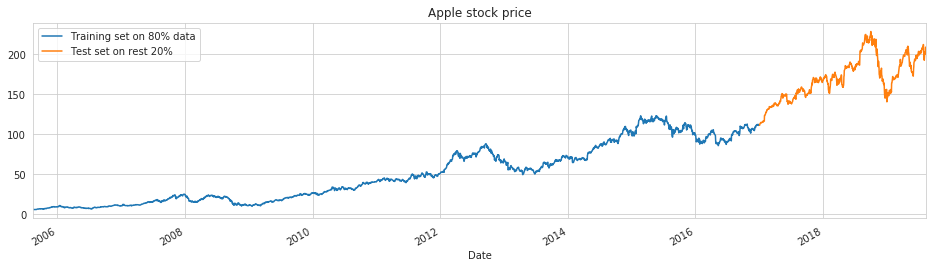

In [13]:
data["Adj Close"][:'2016'].plot(figsize=(16,4),legend=True)
data["Adj Close"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set on 80% data','Test set on rest 20%'])
plt.title('Apple stock price')
plt.show()

### Plotted the number of Stocks purchased by people. Seems like the stock purchase went stable post 2015. We can see that the stocks were purchased at a high volume from years mid 2006 to 2014

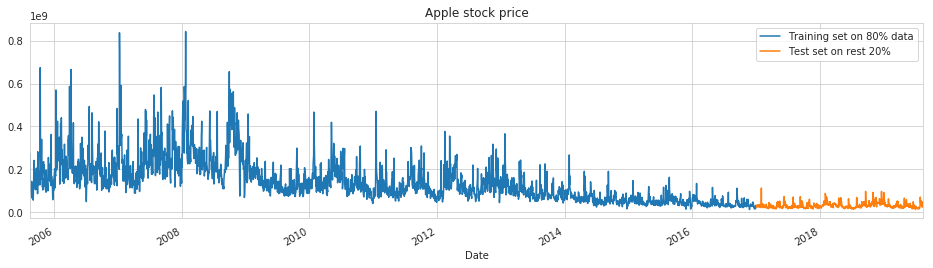

In [14]:
data['Volume'][:'2016'].plot(figsize=(16,4),legend=True)
data['Volume']['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set on 80% data','Test set on rest 20%'])
plt.title('Apple stock price')
plt.show()

In [0]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_scaled = sc.fit_transform(training)

### 60 Timestamps ..since the data will train the model on previous 60 rows to predict the next value

In [0]:
# Creating a data structure with 60 timestamps and 1 output

X_train = []
y_train = []
for i in range(60, 2820):
    X_train.append(training_scaled[i - 60 : i , 0])
    y_train.append(training_scaled[i,0])
    
X_train, y_train = np.array(X_train) , np.array(y_train)

In [0]:
# Reshaping

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [18]:

# Importing keras libs and packages

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error



Using TensorFlow backend.


In [19]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)


W0817 15:54:21.022677 139858341410688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0817 15:54:21.074766 139858341410688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0817 15:54:21.081903 139858341410688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0817 15:54:21.344488 139858341410688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0817 15:54:21.356760 

Epoch 1/50
2760/2760 [==============================] - 18s 6ms/step - loss: 0.0758
Epoch 2/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0696
Epoch 3/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0691
Epoch 4/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0685
Epoch 5/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0678
Epoch 6/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0681
Epoch 7/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0678
Epoch 8/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0679
Epoch 9/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0675
Epoch 10/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0677
Epoch 11/50
2760/2760 [==============================] - 15s 5ms/step - loss: 0.0677
Epoch 12/50
2760/2760 [==============================] - 15s 5ms/step - lo

In [0]:
real_stock_price = testing.iloc[: , 2:3].values

In [0]:
dataset_total = pd.concat((training["Adj Close"], testing["Adj Close"]) , axis = 0)
inputs = dataset_total[len(dataset_total) - len(testing) - 60 :].values
inputs = inputs.reshape(-1 , 1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs= scaler.fit_transform(inputs)
inputs = scaler.transform(inputs)

In [0]:
X_test = []
for i in range(60, 705):
    X_test.append(inputs[i - 60 : i , 0])

In [0]:
X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0] , X_test.shape[1] , 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

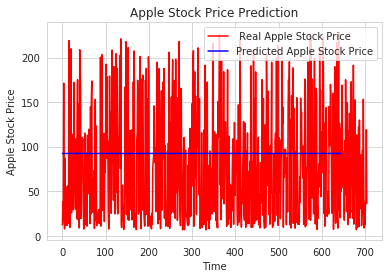

In [25]:
plt.plot(real_stock_price, color = 'red' , label = ' Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue' , label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price') 
plt.legend()
plt.show()



### The above plot displays the real stock price vs the predicted. The predicted stock price is a straight line which might be because of the data. Since it is a large dataset, and divding it randomly might have caused some noise. Besides that, it can also be infered that the stock price is almost always constant over the years giving the individual who invested a stable stock to consider for a long run. 
###There is also a possibility that money would have gained value over the years. This I could say is because Apple buying volumes are constant and the price of closing value for the day varies. 